#### Developed by: João Santos.
### Machine learning and the Iris dataset
* You can read more about it here: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)
* It's a <i><b>SUPERVISED LEARNING</b></i> problem: Predicting the species of an iris flower using ML

In [1]:
# This is ML botanical iris.
# Would be happy if it worked for follower or visitant.
# the image that explain the all code is here: 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
#import sklearn.externals.joblib as extjoblib
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('iris.csv')
data.columns
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIRGINICA
146,6.3,2.5,5.0,1.9,VIRGINICA
147,6.5,3.0,5.2,2.0,VIRGINICA
148,6.2,3.4,5.4,2.3,VIRGINICA


In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


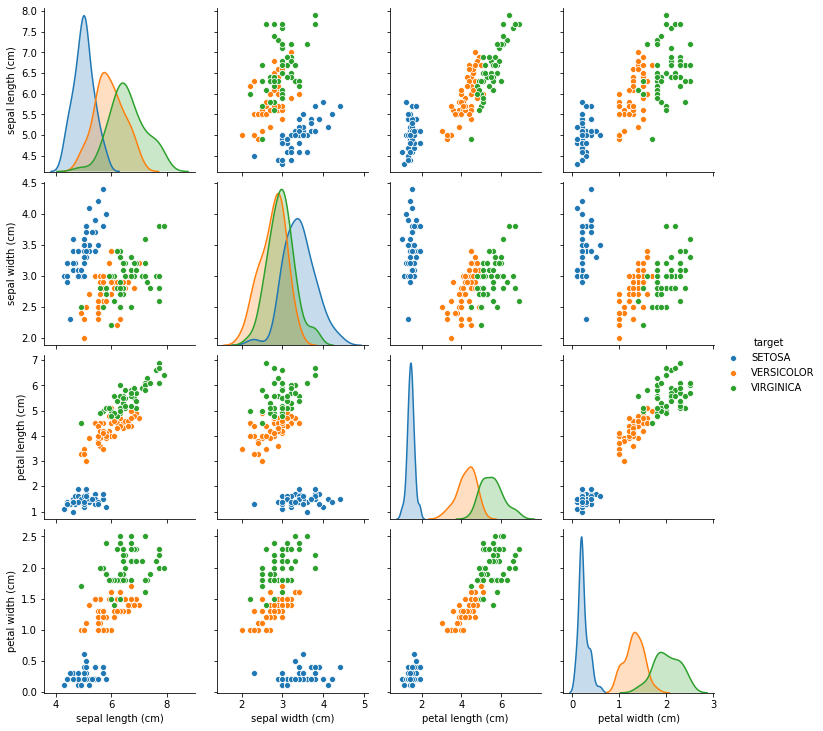

In [5]:
# plotting the target 
sb.pairplot(data,hue='target')

In [6]:
# show only the numbers 
x =np.array(data.drop('target',1))
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# show the all target
y = np.array(data.target)
y

array(['SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA',
       'SETOSA', 'SETOSA', 'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR',
       'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR',
       'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR',
       'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR',
       'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR',
       'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR',
       'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR', 'VERSICOLOR',
       'VERSICOLO

In [8]:
# implementing the knn algorithm to predict the iris type.
knn = KNeighborsClassifier(n_neighbors = 3)

In [9]:
# O(1)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# predicting the iris target 
knn.predict([[4.3,3.5,2.1,0.9]])

array(['SETOSA'], dtype=object)

In [11]:
knn.predict([[7.8,6.5,4.7,2.3]])

array(['VIRGINICA'], dtype=object)

In [12]:
knn.predict([[6.5,6.4,4.7,1.2]])

array(['VERSICOLOR'], dtype=object)

In [13]:
# saving model
joblib.dump(knn,'iris_model.pkl')

['iris_model.pkl']

In [14]:
#loading model
knn2 = joblib.load('iris_model.pkl')

In [15]:
knn2.classes_

array(['SETOSA', 'VERSICOLOR', 'VIRGINICA'], dtype=object)

In [16]:
knn2.predict([[4.5,3.9,2.1,5.9]])

array(['VIRGINICA'], dtype=object)

In [17]:
knn2.predict([[12.0,8.0,9.0,10.0]])

array(['VIRGINICA'], dtype=object)

In [19]:
knn2.predict([[6.0,2.0,7.0,5.0]])#vitoria

array(['VIRGINICA'], dtype=object)